**Import Statements**

In [1]:
# sklearn
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.cluster import SpectralClustering
from sklearn.mixture import GaussianMixture
from sklearn.cluster import OPTICS
from sklearn.cluster import KMeans
# pyplot
from matplotlib import pyplot as plt
# others
from scipy import stats as st
import pandas as pd
import numpy as np

**Loading Data & Preprocessing**

In [2]:
"""
Popular Songs From TikTok 2022
There are 263 different songs here- I would consider
this dataset to be a better size for the purposes
of testing this playlist classifier model
"""

# read songs into pandas dataframe
df = pd.read_csv("tiktok_songs_2022.csv")

# drop unnecessary features such as url
df.drop(columns=["track_pop","album","artist_pop"], inplace=True)

# save and map artists to labels
artists = df["artist_name"].unique()
df["artist_name"] = df["artist_name"].factorize()[0]

# save and remove songs feature
songs = df["track_name"]
df.drop("track_name", axis=1, inplace=True)

# show retained features
print(df.columns)
print(artists)

Index(['artist_name', 'danceability', 'energy', 'loudness', 'mode', 'key',
       'speechiness', 'acousticness', 'instrumentalness', 'liveness',
       'valence', 'tempo', 'time_signature', 'duration_ms'],
      dtype='object')
['Kate Bush' 'Harry Styles' 'Nicky Youre' 'Glass Animals' 'Lizzo' 'Joji'
 'Steve Lacy' 'The Kid LAROI' 'Imagine Dragons' 'Jack Harlow' 'LF SYSTEM'
 'Yung Gravy' 'GAYLE' 'Jena Rose' 'Elley Duhé' 'Anitta' 'Jt5k' 'Rosa Linn'
 'Disco Lines' 'KillBunk' 'Panic! At The Disco' 'Arman Aydin' 'Lil Nas X'
 'Stephen Sanchez' 'Kreepa' 'Post Malone' 'Jnr Choi' 'Astelle'
 'sped up nightcore' 'YES YES' 'Camila Cabello' 'XY&O' 'P.S.' 'Tom Odell'
 'Madonna' 'Viva La Panda' 'Luude' 'THE ANXIETY' 'Paradigm'
 'Taylor Watson' 'HotBlock Jmoe' 'John De Sohn' 'Charlie Puth'
 'Alex Alexander' 'Sofía Reyes' 'Kinrose' 'CKay' 'Ed Sheeran' 'Farux'
 'Girll Codee' 'Monaldin' 'Matvey Emerson' 'Shab' 'Becky G' 'VINAI'
 'Thatsimo' 'Bella Poarch' 'Amaarae' 'loafers' 'JAM & Philly' 'Elton John'
 'D

**Principal Component Analysis**

In [3]:
# create a PCA to reduce our dimensionality
pca = PCA(n_components=4)
pca.fit(df)

# reduce dataset
df_reduced = pd.DataFrame(pca.transform(df), columns=['A', 'B', 'C', 'D'])

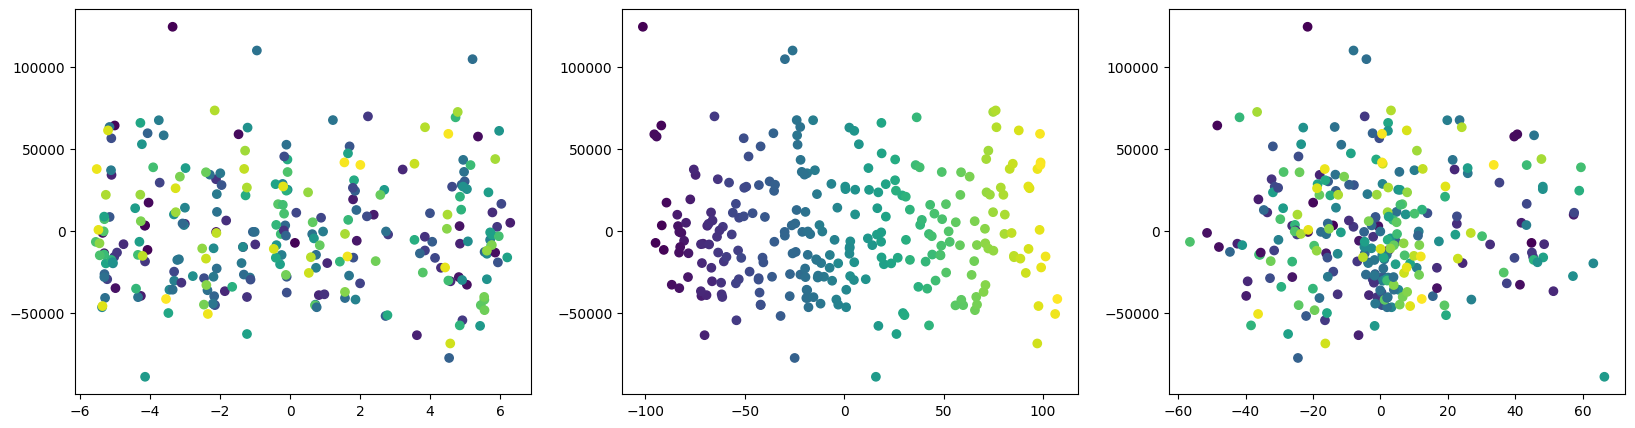

In [5]:
# visualize newly reduced dataset
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5

# visualize genres
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=df["artist_name"])
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=df["artist_name"])
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=df["artist_name"])
plt.show()

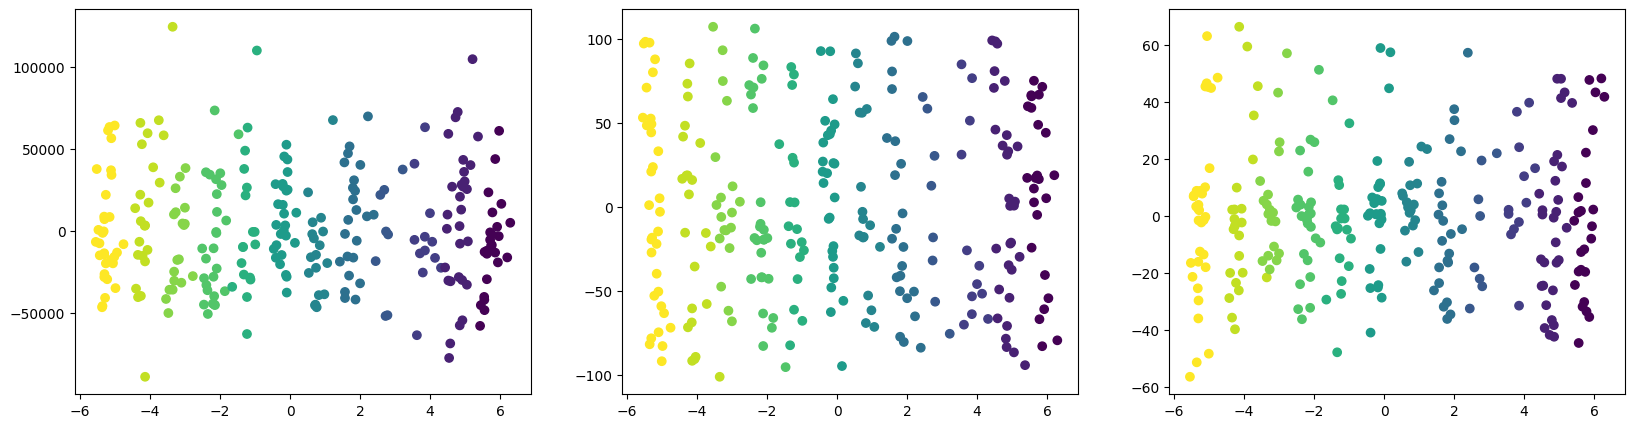

In [6]:
# visualize newly reduced dataset
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5

# visualize keys
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=df["key"])
axis[1].scatter(df_reduced['D'], df_reduced['B'], c=df["key"])
axis[2].scatter(df_reduced['D'], df_reduced['C'], c=df["key"])
plt.show()

**K-Means Playlist Generation**

In [7]:
def find_optimal_cluster(model, data):
    scores, silhouettes = [], []
    if model == 'K-Means':
        for i in range(4, 24):
            km = KMeans(n_clusters=i)
            km.fit(data)
            score = -km.score(data)
            print(f"Score for {i} clusters : {score}\n")
            scores.append(score)
    elif model == 'GMM':
        for i in range(4, 24):
            gmm = GaussianMixture(n_components=i).fit(data)
            score = -gmm.score(data)
            print(f"Score for {i} clusters : {score}\n")
            scores.append(score)
    return scores
    

Score for 4 clusters : 34244188599.994972

Score for 5 clusters : 23882180848.914204

Score for 6 clusters : 16855866958.91415

Score for 7 clusters : 11760933773.291191

Score for 8 clusters : 9153976454.948658

Score for 9 clusters : 6640713732.097141

Score for 10 clusters : 5055311921.552141

Score for 11 clusters : 4293356675.9490833

Score for 12 clusters : 3633096870.4604955

Score for 13 clusters : 3109805335.5209913

Score for 14 clusters : 2600885102.111273

Score for 15 clusters : 2306509037.455927

Score for 16 clusters : 2009745808.4590015

Score for 17 clusters : 1751665158.8473594

Score for 18 clusters : 1579802586.7660108

Score for 19 clusters : 1398420247.7614355

Score for 20 clusters : 1295762167.8887665

Score for 21 clusters : 1120957609.5921736

Score for 22 clusters : 1020771999.9128541

Score for 23 clusters : 914201835.1071223



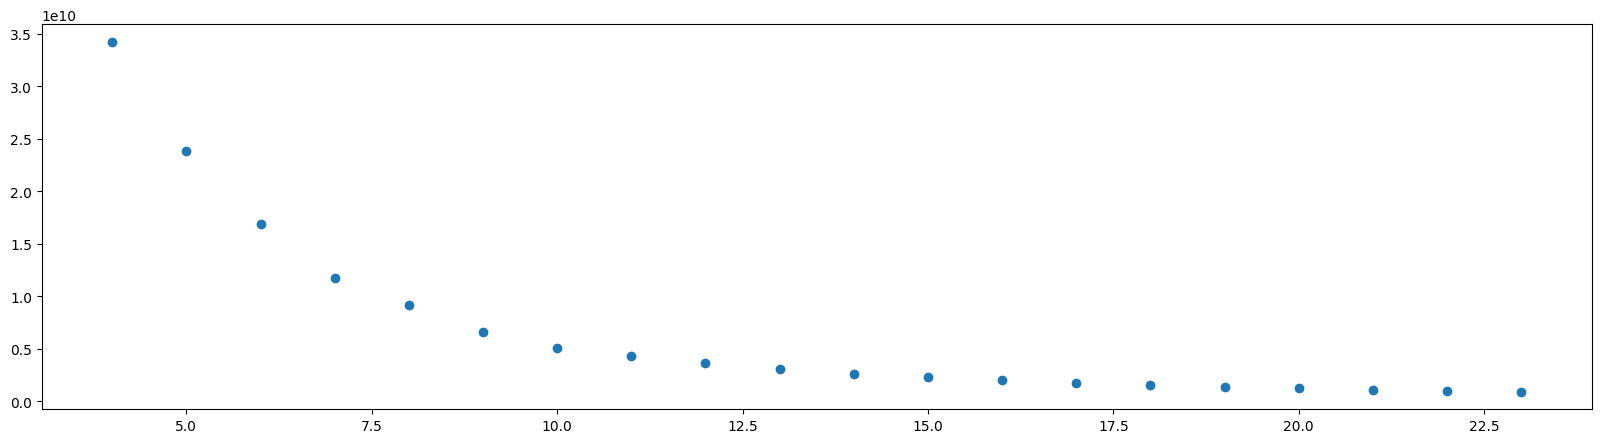

In [8]:
# find the optimal number of playlists
scores = find_optimal_cluster("K-Means", df_reduced)

# plot the results to manually extract the optimal value
plt.scatter(np.arange(4,24), scores)
plt.show()

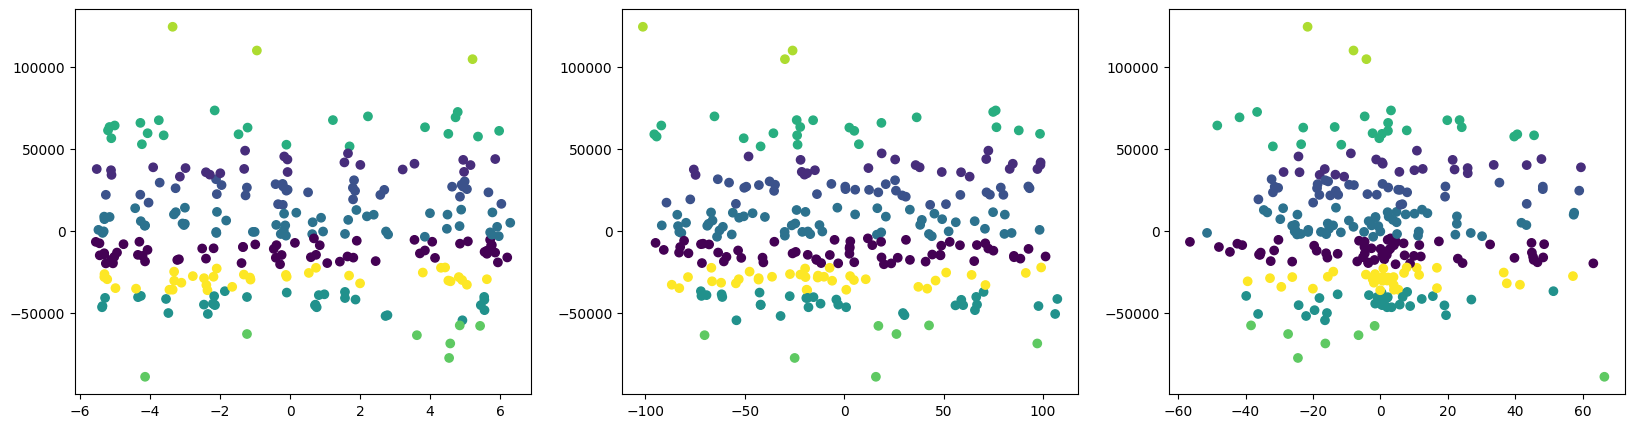

In [11]:
# fit the kmeans model to entire songlist
km = KMeans(n_clusters=9)
km.fit(df_reduced)

# classify data into separate playlists
playlists = km.labels_

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**GMM Playlist Generation**

Score for 4 clusters : 24.391834921747652

Score for 5 clusters : 24.364277635970797

Score for 6 clusters : 24.343920764283293

Score for 7 clusters : 24.374999373145517

Score for 8 clusters : 24.116198369462804

Score for 9 clusters : 24.076367628882423

Score for 10 clusters : 23.985358600339108

Score for 11 clusters : 24.035150076198466

Score for 12 clusters : 23.613892739183974

Score for 13 clusters : 23.71965640751457

Score for 14 clusters : 23.592006923201296

Score for 15 clusters : 23.705162443144282

Score for 16 clusters : 23.31589324552076

Score for 17 clusters : 23.397835213522743

Score for 18 clusters : 23.394392634605637

Score for 19 clusters : 23.24316785389793

Score for 20 clusters : 23.130095016190385

Score for 21 clusters : 23.040593424238686

Score for 22 clusters : 22.967411063108173

Score for 23 clusters : 22.72838037525423



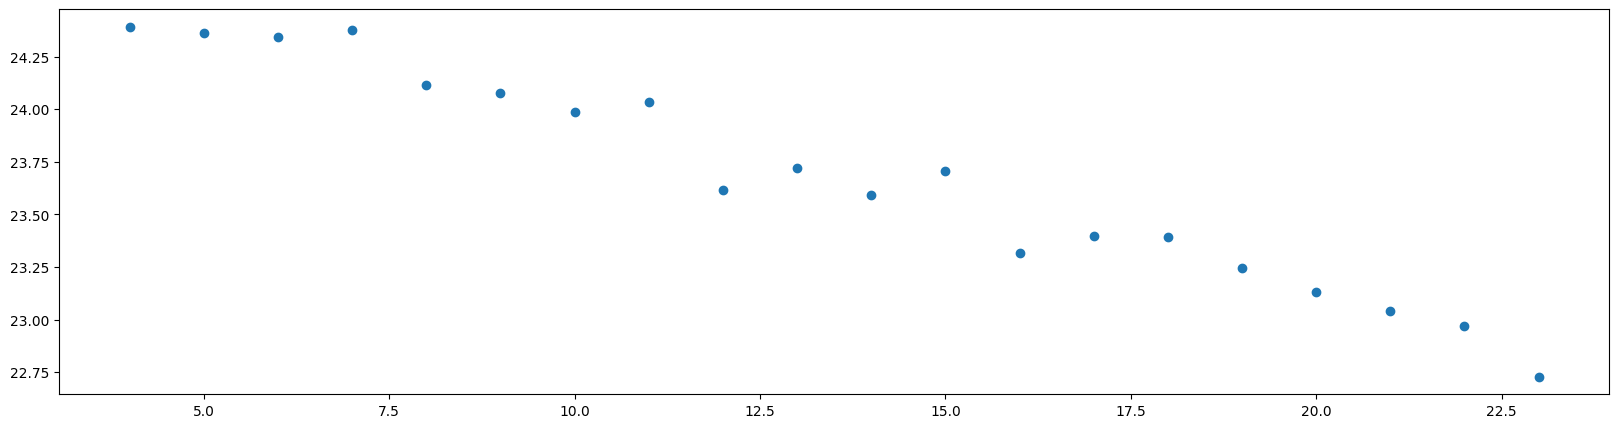

In [12]:
# find the optimal number of playlists
scores = find_optimal_cluster("GMM", df_reduced)

# plot the results to manually extract the optimal value
plt.scatter(np.arange(4,24), scores)
plt.show()

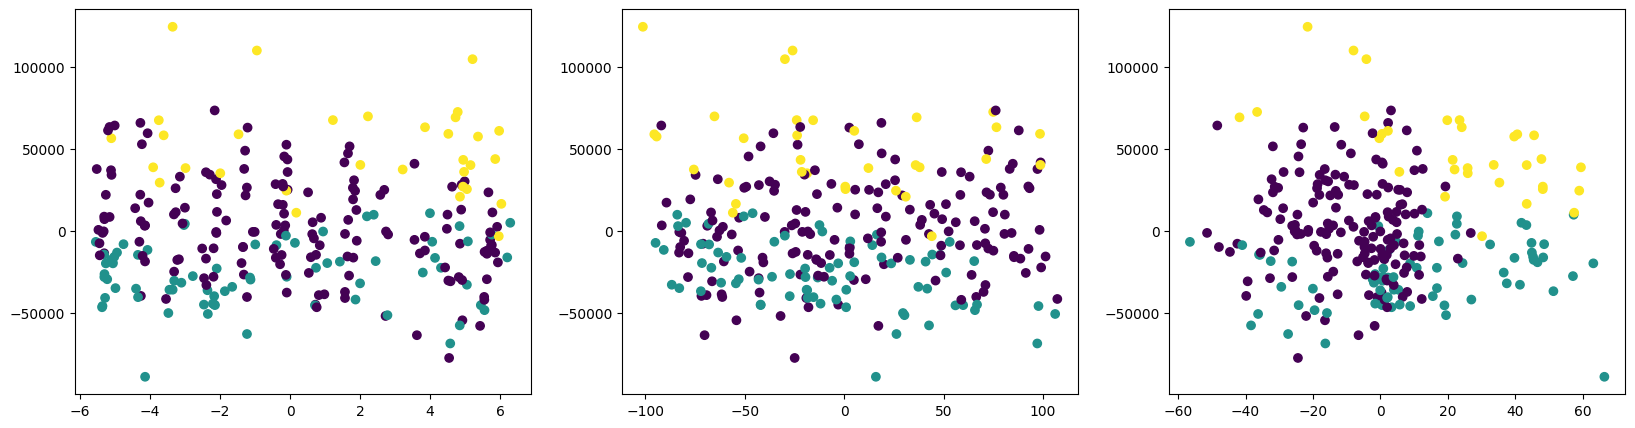

In [29]:
# fit the gmm model to entire songlist
gmm = GaussianMixture(n_components=3, init_params='k-means++')
gmm.fit(df_reduced)

# classify data into separate playlists
playlists = gmm.predict(df_reduced)

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**OPTICS Clustering Playlist Generation**

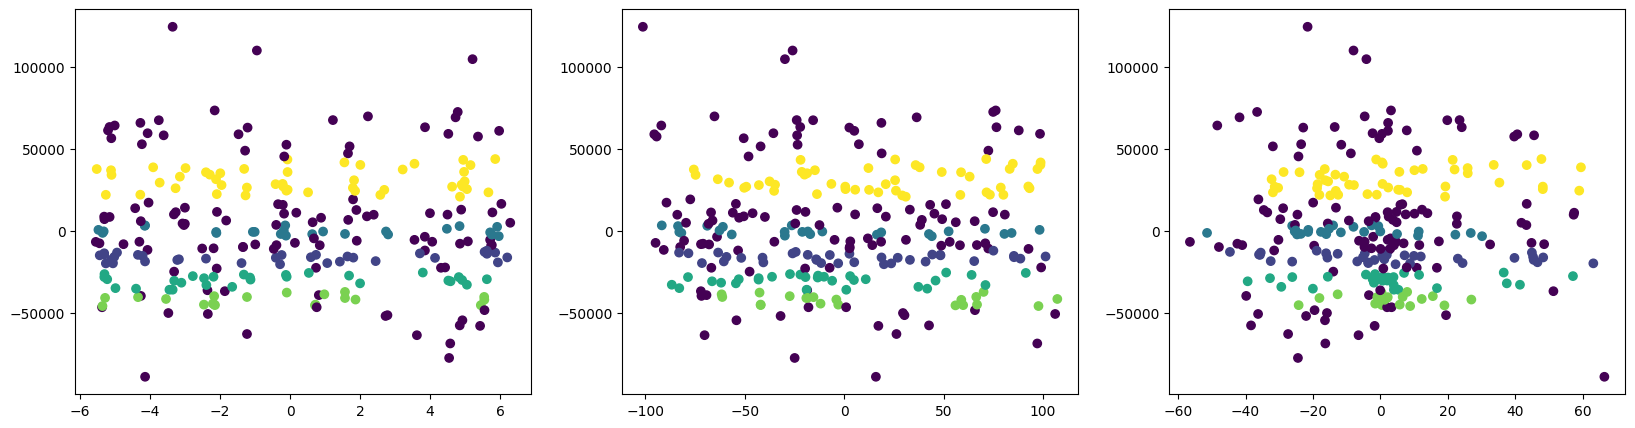

In [28]:
# fit the kmeans model to entire songlist
op = OPTICS(min_samples=20, max_eps=9000)
op.fit(df_reduced)

# classify data into separate playlists
playlists = op.labels_

# visualize newly categorized playlists
fig, axis = plt.subplots(nrows=1, ncols=3)
plt.rcParams["figure.figsize"] = 20, 5
axis[0].scatter(df_reduced['D'], df_reduced['A'], c=playlists)
axis[1].scatter(df_reduced['B'], df_reduced['A'], c=playlists)
axis[2].scatter(df_reduced['C'], df_reduced['A'], c=playlists)
plt.show()

**Quick Visualization of Playlist Classification**

Here we will show how different attributes influence the playlist classifier

In [34]:
def print_playlist(playlist_dict, allow_empty_name, num_songs):
    for i, playlist in enumerate(playlist_dict.values()):
        if not allow_empty_name:
            playlist = playlist[playlist["track_name"].notna()]
        if len(playlist) > num_songs:
            mode = st.mode(playlist["artist_name"])
            artist = artists.tolist()[mode.mode[0]]
            print(f"{i} : {artist}")
            print(playlist.sample(n=num_songs)["track_name"])

C:\Users\jeanp\AppData\Local\Temp\ipykernel_5884\2098500384.py:6: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode = st.mode(playlist["artist_name"])


0 : Doja Cat
169    WAP (feat. Megan Thee Stallion)
64                   THATS WHAT I WANT
47            love nwantiti (ah ah ah)
117                  Moves Like Jagger
76          edamame (feat. Rich Brian)
118                    Pumped Up Kicks
16                                 AMG
Name: track_name, dtype: object
1 : Coopex
129              positions
93                good 4 u
39        When You're Gone
177      Rover (feat. DTG)
143                Whoopty
79                Memories
202    Cool for the Summer
Name: track_name, dtype: object
2 : Doja Cat
86                                   Vacation
179              Mood Swings (feat. Lil Tjay)
0      Running Up That Hill (A Deal With God)
259                                Dandelions
41                                  Long Road
84                                 I AM WOMAN
162        Gravity (feat. Tyler, The Creator)
Name: track_name, dtype: object


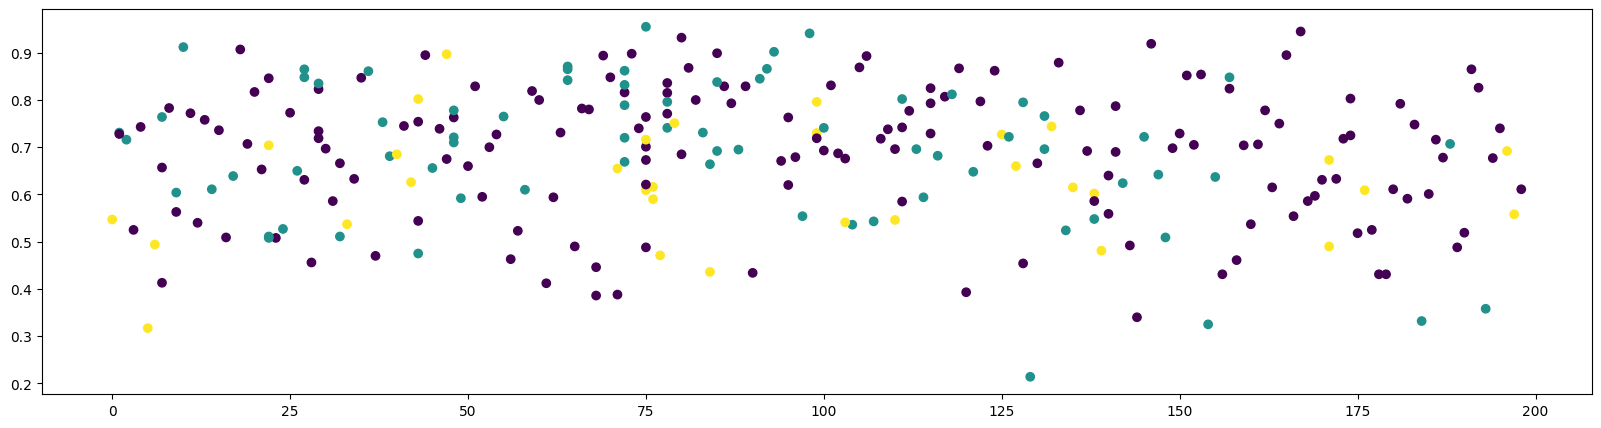

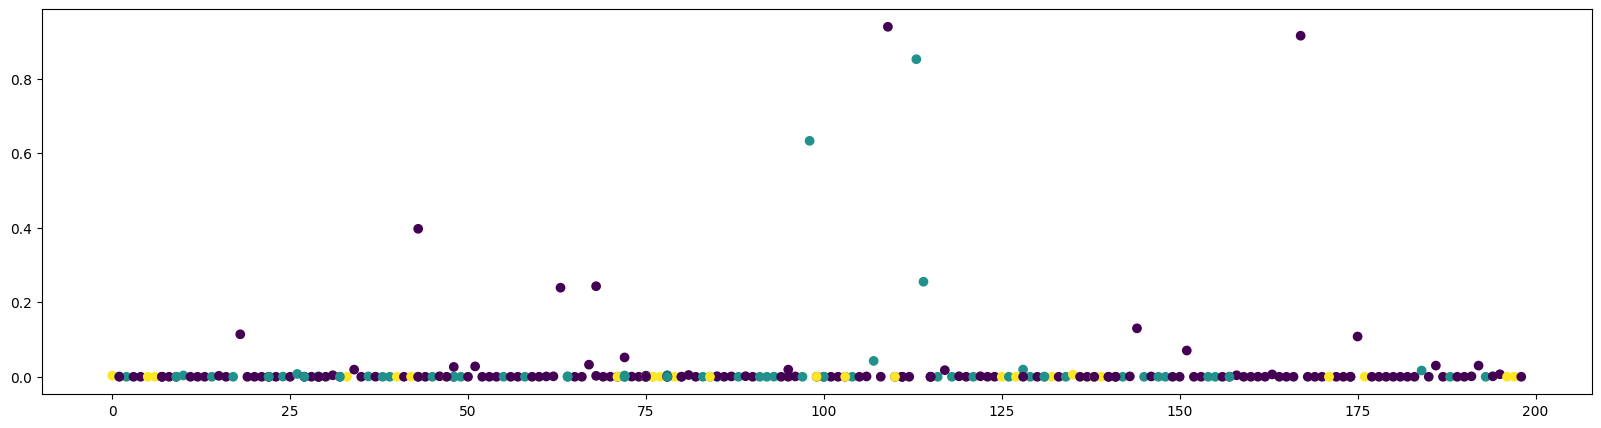

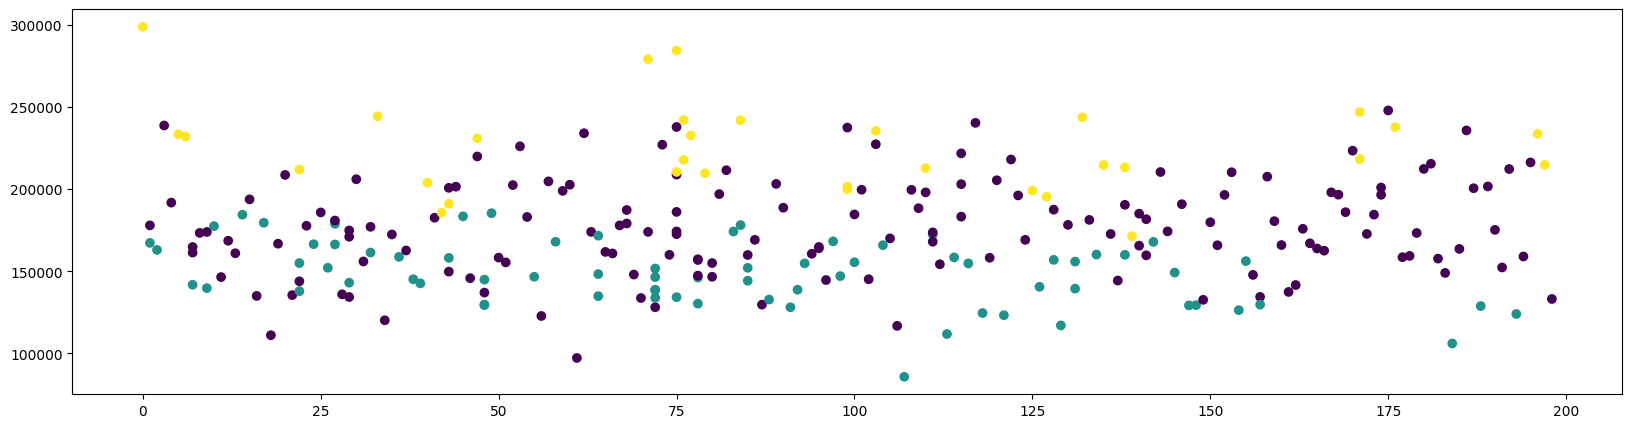

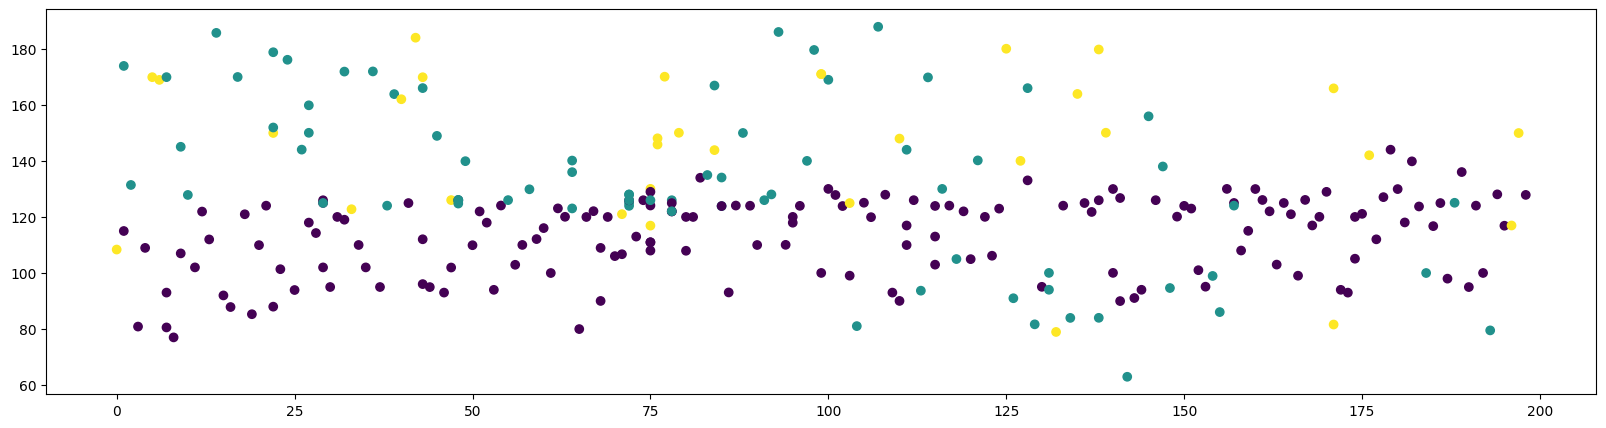

In [35]:
# add the new playlist feature
df["playlist"] = playlists

# add back our song name feature
df["track_name"] = songs

# group songs by playlist
playlist_dict = dict(tuple(df.groupby("playlist")))
print_playlist(playlist_dict, allow_empty_name=False, num_songs=7)

plt.scatter(df["artist_name"], df["energy"], c=playlists)
plt.show()
plt.scatter(df["artist_name"], df["instrumentalness"], c=playlists)
plt.show()
plt.scatter(df["artist_name"], df["duration_ms"], c=playlists)
plt.show()
plt.scatter(df["artist_name"], df["tempo"], c=playlists)
plt.show()

**Playlist Name Generation**

**Classifying New Songs**